In [69]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
# For evaluation
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.metrics import recall_score,precision_score 
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("D:\\Machine Learning Projects\\Project\\KNN-Cancer Data\\Cancer Data.csv")

In [3]:
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


In [7]:
print("Dataset Overview:")
print(df.head())


Dataset Overview:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area

In [8]:
print("\nDataset Information:")
print(df.info())



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  peri

In [9]:
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064 

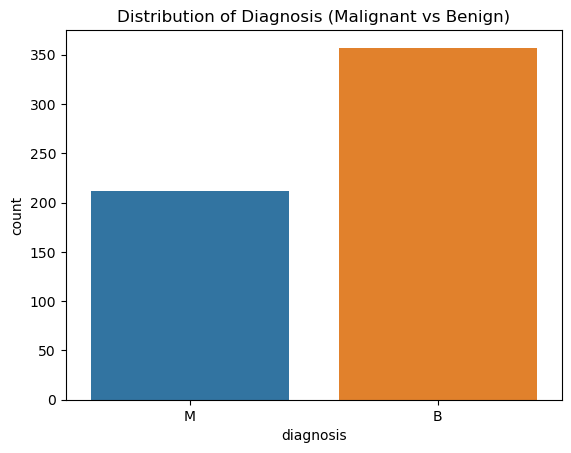

In [14]:
# Count the distribution of target variable (Malignant and Benign)
sns.countplot(x='diagnosis', data=df)
plt.title('Distribution of Diagnosis (Malignant vs Benign)')
plt.show()

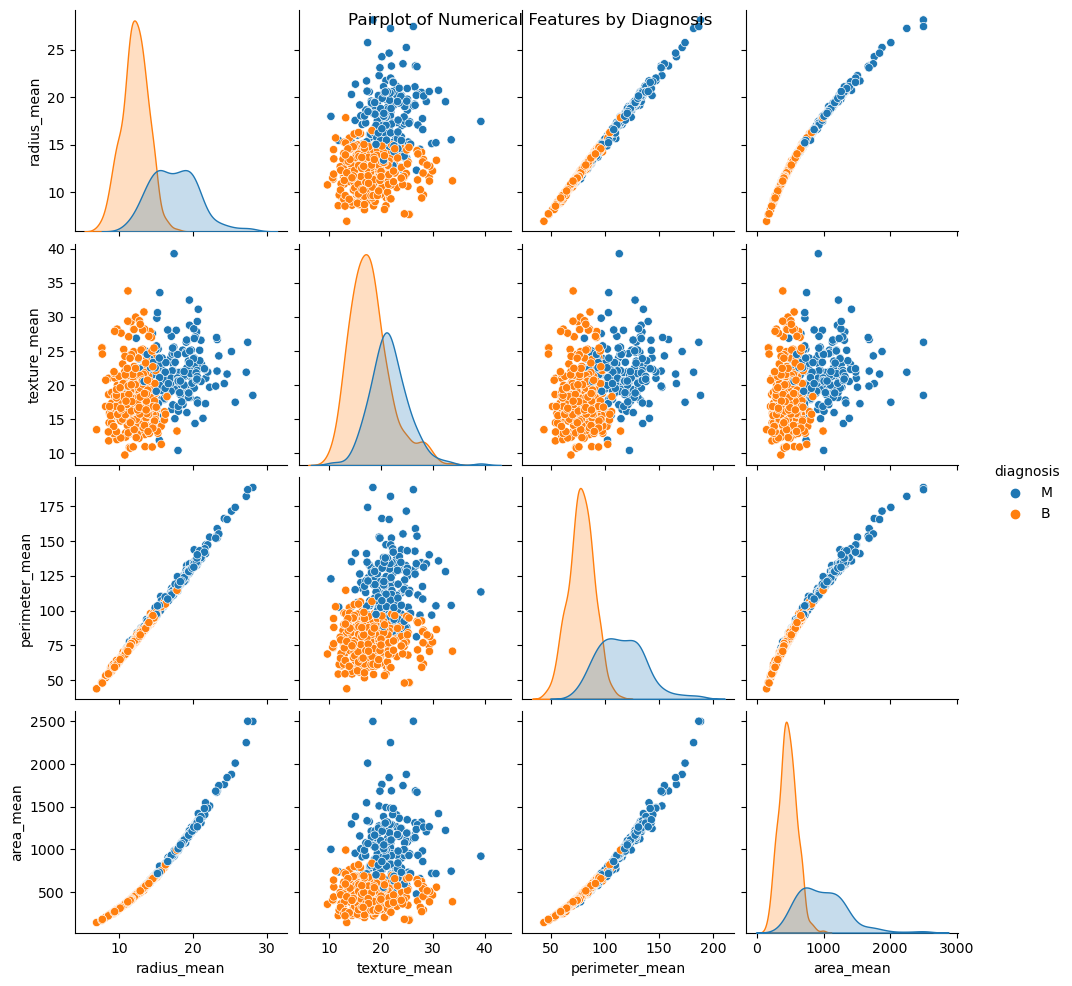

In [15]:
# Pairplot to visualize relationships between numerical features by diagnosis
sns.pairplot(df, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean'])
plt.suptitle('Pairplot of Numerical Features by Diagnosis')
plt.show()

C:\Users\Ajay\AppData\Local\Temp\ipykernel_944\3893878881.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


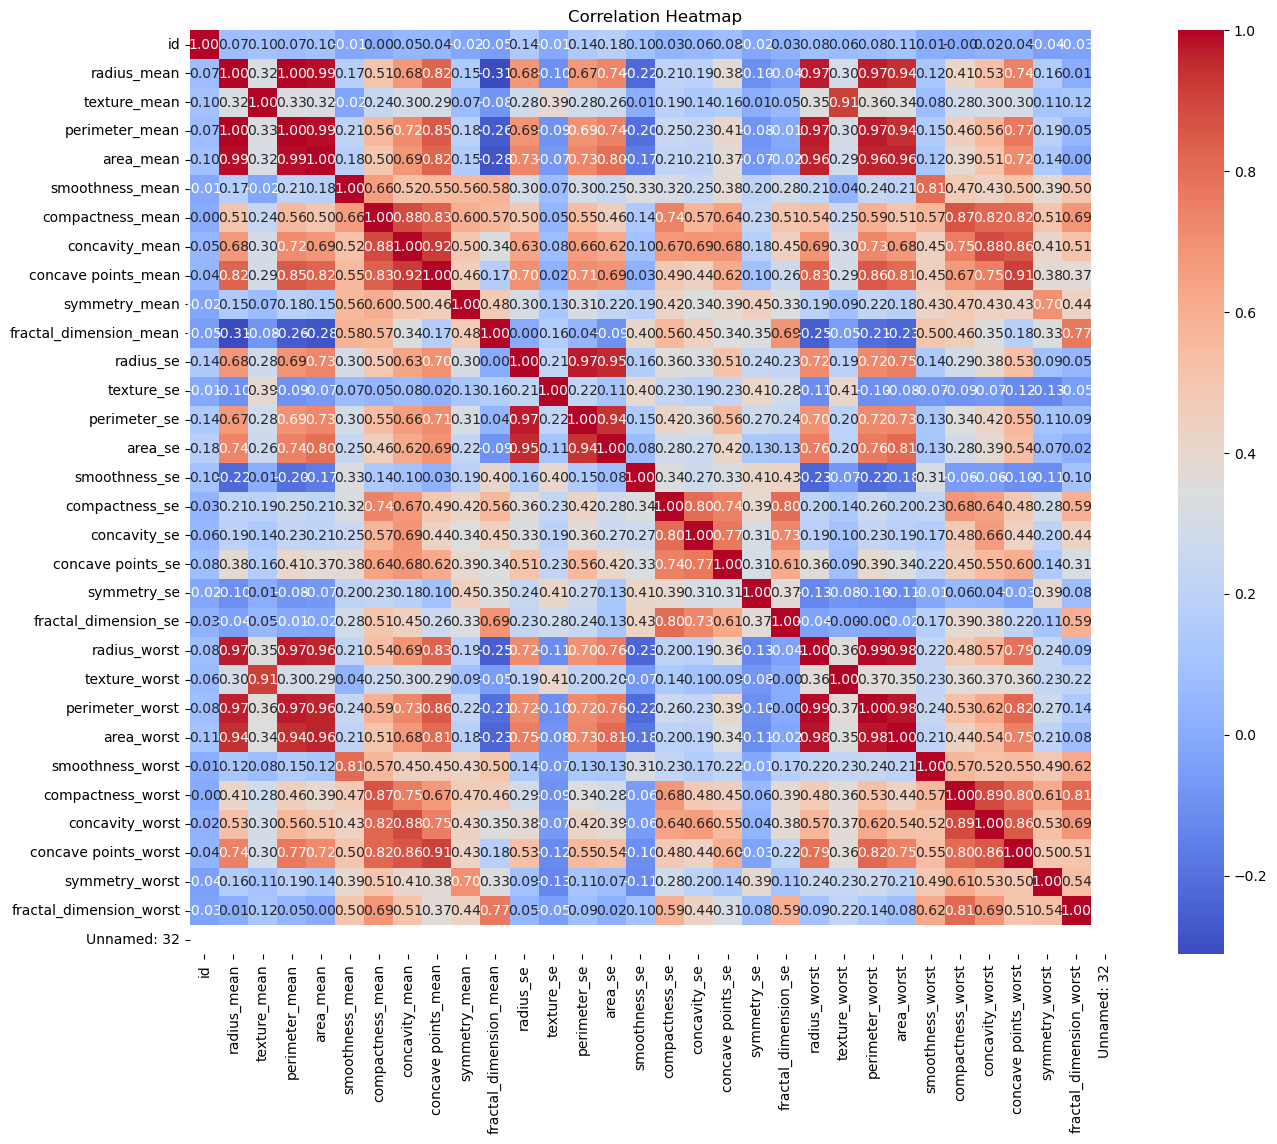

In [16]:
# Correlation heatmap to identify relationships between features
corr_matrix = df.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

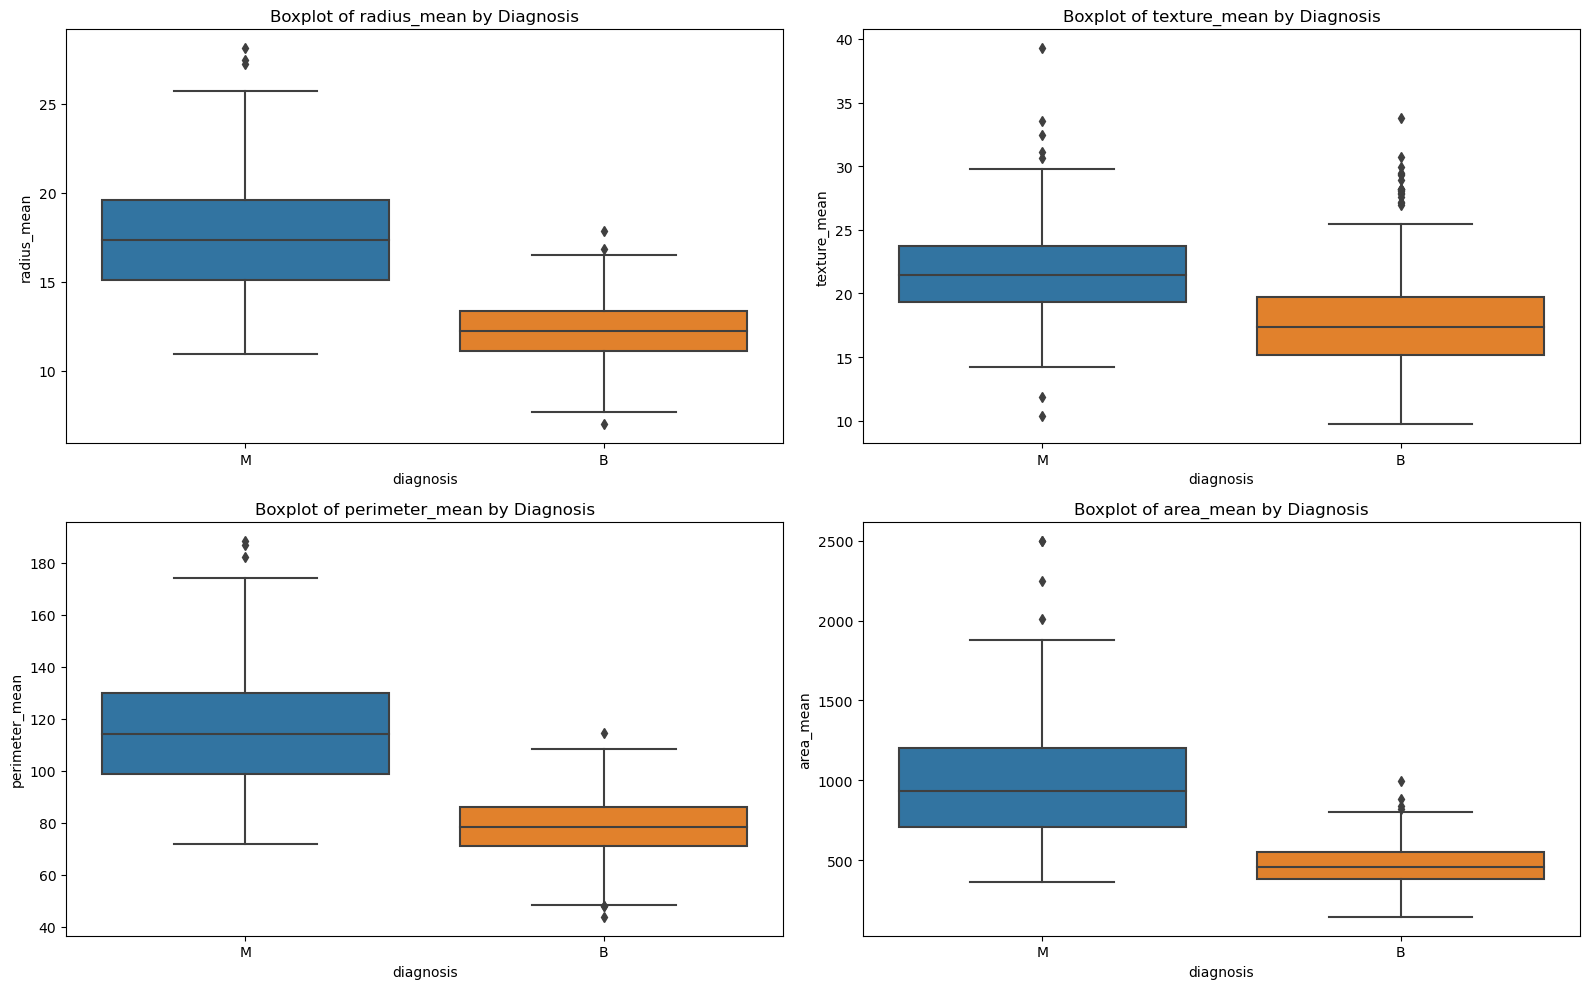

In [17]:
# Box plots to visualize the distribution of numerical features by diagnosis
plt.figure(figsize=(16, 10))
for i, feature in enumerate(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='diagnosis', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Diagnosis')

plt.tight_layout()
plt.show()

In [18]:
# Missing Value Check
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [19]:
# Recode Categorical variables to Numeric (dummy variable creation)
df.dtypes # There is only ONE categ. var, i.e. diagnosis (Dependent variable)

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [20]:
df['diagnosis'].value_counts() # Majority Class is "B", so lets recode "B" as 0 (for tie-breaker in KNN)
df['diagnosis'] = np.where(df['diagnosis'] == 'B', 0, 1)
df['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

In [21]:
# Drop id column
df.drop(['id'], axis = 1, inplace = True)
df.shape

(569, 32)

In [22]:
# Data splitting into train and test
# Splitting the data into x and y
x=df.drop(columns='diagnosis')
y=df.diagnosis

In [23]:
# Train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,stratify=y)

In [35]:
# Shape of the train and test sets
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((455, 31), (455,), (114, 31), (114,))

In [40]:
# Instantiate and fit the imputer on the training data
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(x_train)

# Transform the test data using the fitted imputer
X_test_imputed = imputer.transform(x_test)

In [41]:
# Standardize the features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_imputed)
X_test_std = scaler.transform(X_test_imputed)

# Our train and test sets are now scaled

In [43]:
# Model building
M1 = KNeighborsClassifier().fit(X_train_std, y_train)
M1

KNeighborsClassifier()

In [44]:
testPred = M1.predict(X_test_std)
testPred

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1])

In [45]:
# Create a df to store the model predictions
Test_Prob_Df = pd.DataFrame()
Test_Prob_Df['Class'] = testPred

In [46]:
# Probability Prediction: Probability is just the fraction of 0s and 1s in the K nearest neighbours
Test_Prob = pd.DataFrame(M1.predict_proba(X_test_std))
Test_Prob_Df = pd.concat([Test_Prob_Df, Test_Prob], axis = 1)

Accuracy Score: 0.956140350877193
f1_score: 0.9382716049382716
Precision: 0.9743589743589743
Recall: 0.9047619047619048
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



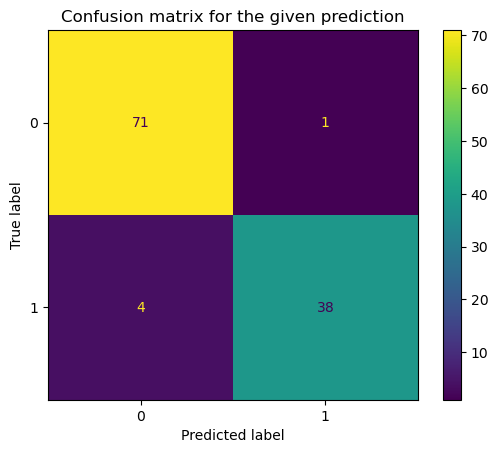

In [51]:
# Model evaluation
def evaluation(y_test,testPred):
    
    print('Accuracy Score:',accuracy_score(y_test,testPred))
    print('f1_score:',f1_score(y_test,testPred))
    print('Precision:',precision_score(y_test,testPred))
    print('Recall:',recall_score(y_test,testPred))
    print('Classification report:\n',classification_report(y_test,testPred))
    cm=confusion_matrix(y_test,testPred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title('Confusion matrix for the given prediction')
    plt.show()
evaluation(y_test,testPred)

In [62]:
myNN = range(1,14,2) # list(range(1,14,2))
myP = range(1,4,1) # list(range(1,4,1)) . This "p" is "h" in minkowski formula
param_grid = {'n_neighbors': myNN, 'p': myP}

grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid=param_grid, cv=5, scogrid_search.fit(X_train, y_train)
ring='accuracy')


In [63]:
grid_search

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 14, 2), 'p': range(1, 4)},
             scoring='accuracy')

In [73]:
grid_search.fit(X_train_std, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 14, 2), 'p': range(1, 4)},
             scoring='accuracy')

In [74]:
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'n_neighbors': 3, 'p': 2}


In [79]:
best_knn_model = grid_search.best_estimator_
best_knn_model

KNeighborsClassifier(n_neighbors=3)

In [76]:
y_pred_best = best_knn_model.predict(X_test_std)
y_pred_best

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1])

Accuracy Score: 0.956140350877193
f1_score: 0.9382716049382716
Precision: 0.9743589743589743
Recall: 0.9047619047619048
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



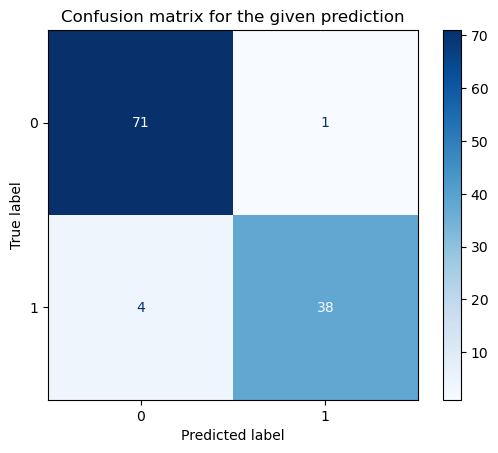

In [80]:
# Model evaluation
def evaluation(y_test, y_pred_best):
    print('Accuracy Score:', accuracy_score(y_test, y_pred_best))
    print('f1_score:', f1_score(y_test, y_pred_best))
    print('Precision:', precision_score(y_test, y_pred_best))
    print('Recall:', recall_score(y_test, y_pred_best))
    print('Classification report:\n', classification_report(y_test, y_pred_best))

    cm = confusion_matrix(y_test, y_pred_best)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_knn_model.classes_)
    disp.plot(cmap='Blues', values_format='d')
    plt.title('Confusion matrix for the given prediction')
    plt.show()

# Call the function
evaluation(y_test, y_pred_best)
